# Importing librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Loading

In [2]:
data_frame = pd.read_csv("C:/Users/nazil/Downloads/MY_ML/Notebook/modified_diabetes_data.csv")

In [3]:
data_frame.shape

(768, 9)

In [4]:
data_frame.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [5]:
data_frame.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True
767,1,93,70,31,0,30.4,0.315,23,False


# binary Encoding

In [6]:
Outcome_encoding= {False: 0,True: 1}
data_frame['Outcome']=data_frame['Outcome'].map(Outcome_encoding)
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
data_frame.to_csv('Modified.csv', index=False)

# Checking for missing data

In [7]:
print (data_frame.isnull().values.any())


False


# Correlation matrix

In [8]:
correlation = data_frame.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

#### => we create a heatmaap in order to see the correlations better

<Axes: >

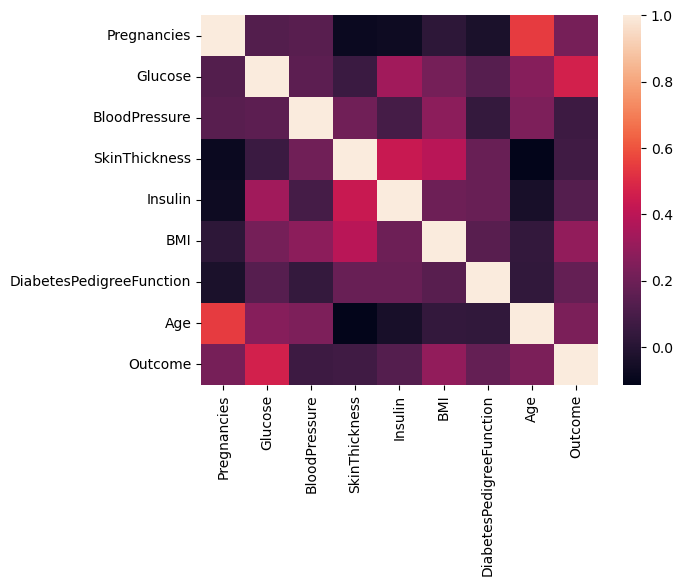

In [9]:
sns.heatmap(correlation)

### Mold Data
#### Data Types
Inspect data types to see if there are any issues. Data should be numeric.

In [10]:
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###  => all the data in numeris , so no need to change its type

# Spliting the data

70% for training, 30% for testing

In [11]:
X = data_frame.drop('Outcome',axis=1)
y = data_frame['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=78) 
 

## Standard Scaler

In [13]:
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.fit_transform(X_test))

In [14]:
X_train

,0,1,2,3,4,5,6,7
0,-0.845025,-0.411050,-0.540984,1.604295,0.829464,0.445863,-0.119944,-0.790632
1,3.866495,1.358683,0.103754,1.286302,0.289763,1.129365,1.157761,1.198997
2,2.688615,0.779497,0.641036,-0.112867,0.256032,-1.237578,-0.660266,2.064053
3,0.038385,0.071604,-0.433527,-1.321240,-0.671580,0.002852,-0.720655,0.160929
4,-0.845025,1.165621,0.103754,0.014330,0.745136,-0.807224,-1.048028,-0.790632
...,...,...,...,...,...,...,...,...
532,0.627325,-1.312005,-0.218615,0.586718,-0.671580,-0.731280,-0.444137,0.679963
533,-0.845025,0.168135,-0.755896,0.523119,0.610211,-0.414844,1.106907,-1.050149
534,-0.256085,1.905691,-0.326071,0.268725,-0.081282,0.256001,-0.577629,-0.617621
535,-0.845025,0.747320,0.641036,1.222703,-0.671580,1.179994,0.490304,-0.444610


In [15]:
X_test

,0,1,2,3,4,5,6,7
0,0.670471,-0.890215,-3.219005,-1.216635,-0.750631,-0.284553,-0.042371,-0.203210
1,0.367381,-2.276882,-0.234246,-1.216635,-0.750631,-0.897674,0.194739,0.207118
2,-0.541887,-0.801705,0.054602,-0.120715,-0.039072,-0.769941,0.123054,-1.023867
3,-0.844977,-0.005109,0.536015,1.157859,-0.057797,0.890597,-0.704071,-0.449407
4,-0.541887,-0.093619,0.632297,-1.216635,-0.750631,1.388758,0.486990,-1.023867
...,...,...,...,...,...,...,...,...
226,-1.148067,1.175033,-0.811941,-1.216635,-0.750631,-1.293649,-0.723371,2.587021
227,0.973560,0.761983,0.439732,-1.216635,-0.750631,0.941690,-0.715100,0.781577
228,-0.541887,0.230920,0.343449,0.366361,1.168706,0.149741,0.205767,-0.695604
229,1.579740,0.968508,0.536015,0.609899,0.185631,-0.144046,-0.971509,0.945709


# RandomForest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [17]:
predict = rf_model.predict(X_test)
predict

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score,classification_report
print('Classification Report:\n')
print(classification_report(y_test,predict))

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       153
           1       0.75      0.67      0.71        78

    accuracy                           0.81       231
   macro avg       0.80      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231



In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
accuracy


0.8138528138528138

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)


LogisticRegression(random_state=42)

In [21]:
predict = lr_model.predict(X_test)
predict

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [22]:
lr_model.score(X_train,y_train)

0.770949720670391

# Support vector Machine

In [23]:
from sklearn.svm import SVC 

svm_model = SVC(kernel='linear', C=1.0, gamma='scale')

In [24]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
predict = svm_model.predict(X_test)

In [26]:
predict

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
accuracy

0.7792207792207793

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
predict = dt_model.predict(X_test)
predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [30]:
DTC_acc = accuracy_score(predict,y_test)
print(DTC_acc)

0.7056277056277056


# knn(K-Nearest Neighbors)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=80)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=80)

In [33]:
knn.score(X_test,y_test)

0.7619047619047619

# Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
Gbc=GradientBoostingClassifier()

In [36]:
Gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [37]:
Gbc_y_pre=Gbc.predict(X_test)

In [38]:
Gbc_y_pre

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [39]:
Gbc_acc=s=accuracy_score(Gbc_y_pre,y_test)

In [40]:
Gbc_acc

0.7575757575757576

# Naive Bayes

## Gaussian

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
NBC_gu=GaussianNB()
NBC_gu.fit(X_train,y_train)
NBC_gu.score (X_test,y_test)

0.7705627705627706

In [43]:
y_pre=NBC_gu.predict(X_test)

In [44]:
y_pre

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [46]:
confusion_matrix(y_pre,y_test)

array([[128,  28],
       [ 25,  50]], dtype=int64)

In [47]:
accuracy_score(y_pre,y_test)

0.7705627705627706

# Multinomial

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler=MinMaxScaler()

In [50]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [51]:
NBC_m=MultinomialNB()

In [52]:
NBC_m.fit(X_train_scaled, y_train)

MultinomialNB()

In [53]:
accuracy=NBC_m.score(X_test_scaled, y_test)
accuracy

0.6623376623376623

In [54]:
NBC_m.score (X_test,y_test)

0.6753246753246753

In [55]:
y_pre=NBC_m.predict(X_test)

In [56]:
y_pre

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
confusion_matrix(y_pre,y_test)

array([[141,  63],
       [ 12,  15]], dtype=int64)

In [58]:
accuracy_score(y_pre,y_test)

0.6753246753246753

# Bernoulli

In [59]:
from sklearn.naive_bayes import BernoulliNB

In [60]:
NBC_b=BernoulliNB()
NBC_b.fit(X_train,y_train)
NBC_b.score(X_test,y_test)

0.7402597402597403

In [61]:
y_pre=NBC_gu.predict(X_test)

In [62]:
y_pre

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [63]:
confusion_matrix(y_pre,y_test)

array([[128,  28],
       [ 25,  50]], dtype=int64)

In [64]:
accuracy_score(y_pre,y_test)

0.7705627705627706

In [65]:
import joblib

In [66]:
joblib.dump(rf_model,'Model_Joblibb')

['Model_Joblibb']